<a href="https://colab.research.google.com/github/Bishal2727/C-programs/blob/main/Face_mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:06<00:00, 27.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [ ]:
import os
filenames_with_mask = os.listdir('/content/face-mask-dataset-omkargurav/data/with_mask')


In [ ]:
filenames_without_mask = os.listdir('/content/face-mask-dataset-omkargurav/data/without_mask')


In [12]:
len(filenames_without_mask)

3828

In [15]:
len(filenames_with_mask)

3725

**Importing dependencies**

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

**Creating labels for both the classes of images**

In [17]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828

In [21]:
lenght_of_labels_without_mask = len(without_mask_label)
print(lenght_of_labels_without_mask)
len(with_mask_label)

3828


3725

In [22]:
labels = with_mask_label + without_mask_label

In [23]:
print(len(labels))

7553


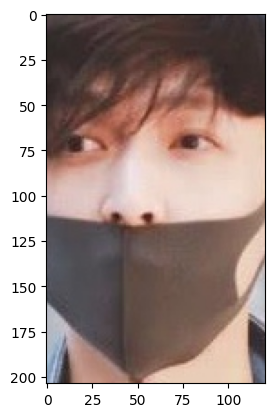

In [25]:
img = mpimg.imread('/content/face-mask-dataset-omkargurav/data/with_mask/with_mask_1001.jpg')
plt.imshow(img)

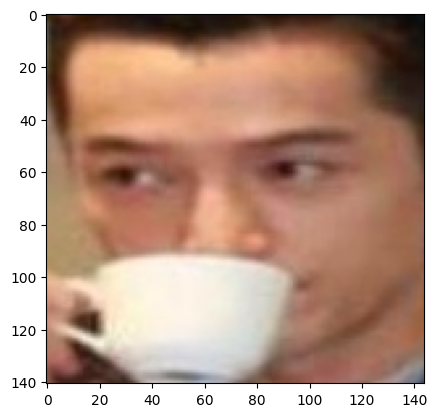

In [27]:
img_without_mask = mpimg.imread('/content/face-mask-dataset-omkargurav/data/without_mask/without_mask_1002.jpg')
plt.imshow(img_without_mask)

**Resizing all the images**

In [28]:
# Creating new directories
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

In [29]:
# Resizing the images for mask
with_mask_folder = '/content/face-mask-dataset-omkargurav/data/with_mask/'
with_mask_resized = '/content/with_mask_resized/'

for filename in os.listdir(with_mask_folder):
  img_path = with_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')

  img_path_save = with_mask_resized + filename
  img.save(img_path_save)


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [30]:
# Resizing the images without mask
without_mask_folder = '/content/face-mask-dataset-omkargurav/data/without_mask/'
without_mask_resized = '/content/without_mask_resized/'

for filename in os.listdir(without_mask_folder):
  img_path = without_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')

  img_path_save = without_mask_resized + filename
  img.save(img_path_save)


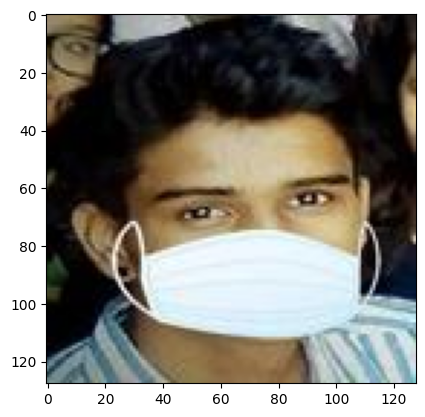

In [31]:
img = mpimg.imread('/content/with_mask_resized/with_mask_1000.jpg')
plt.imshow(img)

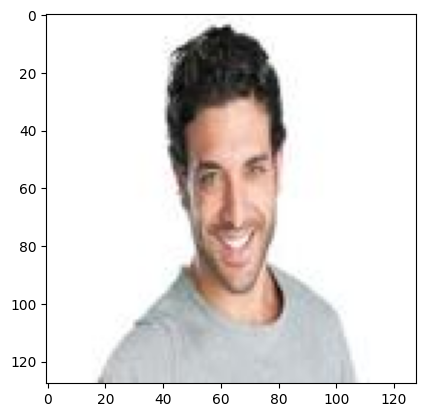

In [32]:
img = mpimg.imread('/content/without_mask_resized/without_mask_1000.jpg')
plt.imshow(img)

**Creating numpy arrays for images**

In [ ]:
import cv2
import glob

imdir = '/content/with_mask_resized/'
ext = ['png','jpg']

files = []
for e in ext:
    files.extend(glob.glob(imdir + '*.' + e))

with_mask_images = np.asarray([cv2.imread(file) for file in files])


In [36]:
imdir = '/content/without_mask_resized/'
ext = ['png','jpg']

files = []
for e in ext:
    files.extend(glob.glob(imdir + '*.' + e))

without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [38]:
print(with_mask_images.shape)
print(without_mask_images.shape)


(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [39]:
combined_images = np.concatenate((with_mask_images,without_mask_images))

In [40]:
print(combined_images.shape)

(7553, 128, 128, 3)


In [41]:
X = combined_images
Y = np.asarray(labels)

**Train test split**

In [42]:
X_train ,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [43]:
print(X_train.shape ,X_test.shape,Y_train.shape,Y_test.shape )

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


**Normalizing the data**

In [44]:
X_train = X_train/255
X_test = X_test/255

**Building the neural network**

In [46]:
import tensorflow as tf
import keras

In [100]:
model = keras.Sequential([


                          keras.layers.Flatten(input_shape=(128,128,3)),
                          keras.layers.Dense(70,activation='relu'),
                          keras.layers.Dense(70, activation='relu'),
                          keras.layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [101]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.6544 - loss: 1.6588
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8175 - loss: 0.4249
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8298 - loss: 0.4086
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.8690 - loss: 0.3295
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.8854 - loss: 0.2923
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8642 - loss: 0.3251
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.8704 - loss: 0.3258
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8849 - loss: 0.2951
Epoch 9/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8810 - loss: 0.2912
Epoch 10/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.9063 - loss: 0.2512


In [122]:
score,acc = model.evaluate(X_test, Y_test)
print("Score: ",score)
print("Accuracy: ",acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8023 - loss: 0.4341
Score:  0.4462473690509796
Accuracy:  0.798808753490448


In [104]:
from google.colab.patches import cv2_imshow

Input the image: /content/OIP.jpg


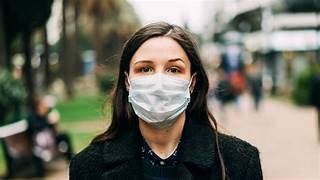

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Person is wearing a mask


In [129]:
image_test_path = input("Input the image: ")
image_test = cv2.imread(image_test_path)
cv2_imshow(image_test)
image_test = cv2.resize(image_test,(128,128))
image_test = image_test/255
image_resize = np.reshape(image_test,[1,128,128,3])
image_predict = model.predict(image_resize)
image_pred_label = np.argmax(image_predict)
if image_pred_label == 1:
  print("Person is wearing a mask")
else:
  print("Person is not wearing a mask")

In [127]:
model.save('mask_model.keras')

Input the image: /content/OIP (3).jpg


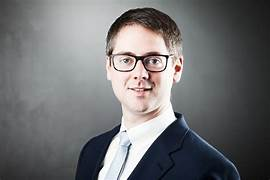

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Person is not wearing a mask


In [130]:
image_test_path = input("Input the image: ")
image_test = cv2.imread(image_test_path)
cv2_imshow(image_test)
image_test = cv2.resize(image_test,(128,128))
image_test = image_test/255
image_resize = np.reshape(image_test,[1,128,128,3])
image_predict = model.predict(image_resize)
image_pred_label = np.argmax(image_predict)
if image_pred_label == 1:
  print("Person is wearing a mask")
else:
  print("Person is not wearing a mask")